In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Análisis Torres

In [17]:
df_torres = pd.read_csv('../Hackathon ISA/Datasets/Torres_STN.csv')
df_torres

,Torre_No,Sector,ID_Linea_F,Area_Empre,Clave
0,Torre 1,Sin sector,CHIVTUNJ1151,CEN,CHIVTUNJ1151-Torre 1
1,Torre 2,Sin sector,CHIVTUNJ1151,CEN,CHIVTUNJ1151-Torre 2
2,Torre 3,Sin sector,CHIVTUNJ1151,CEN,CHIVTUNJ1151-Torre 3
3,Torre 4,Sin sector,CHIVTUNJ1151,CEN,CHIVTUNJ1151-Torre 4
4,Torre 5,Sin sector,CHIVTUNJ1151,CEN,CHIVTUNJ1151-Torre 5
...,...,...,...,...,...
19218,Torre 510,FUNDA,CHINCOPE5001,NOR,CHINCOPE5001-Torre 510
19219,Torre 511,FUNDA,CHINCOPE5001,NOR,CHINCOPE5001-Torre 511
19220,Torre 512,FUNDA,CHINCOPE5001,NOR,CHINCOPE5001-Torre 512
19221,Torre 513,FUNDA,CHINCOPE5001,NOR,CHINCOPE5001-Torre 513


In [18]:
df_torres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19223 entries, 0 to 19222
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Torre_No    19216 non-null  object
 1   Sector      13973 non-null  object
 2   ID_Linea_F  19206 non-null  object
 3   Area_Empre  13973 non-null  object
 4   Clave       19211 non-null  object
dtypes: object(5)
memory usage: 751.0+ KB


In [19]:
df_torres.isnull().sum()

Torre_No         7
Sector        5250
ID_Linea_F      17
Area_Empre    5250
Clave           12
dtype: int64

In [109]:
# Asignar Sin Sector a Nulos
df_torres['Sector'] = df_torres['Sector'].fillna('Sin Sector')
df_torres.isnull().sum()

Torre_No         7
Sector           0
ID_Linea_F       0
Area_Empre    5250
Clave           12
dtype: int64

In [110]:
df_torres["ID_Linea_F"] = df_torres["ID_Linea_F"].fillna("Sin Linea")
df_torres.isnull().sum()

Torre_No         7
Sector           0
ID_Linea_F       0
Area_Empre    5250
Clave           12
dtype: int64

In [112]:
df_torres['Area_Empre'] = df_torres['Area_Empre'].fillna('Sin Area')
df_torres.isnull().sum()

Torre_No       7
Sector         0
ID_Linea_F     0
Area_Empre     0
Clave         12
dtype: int64

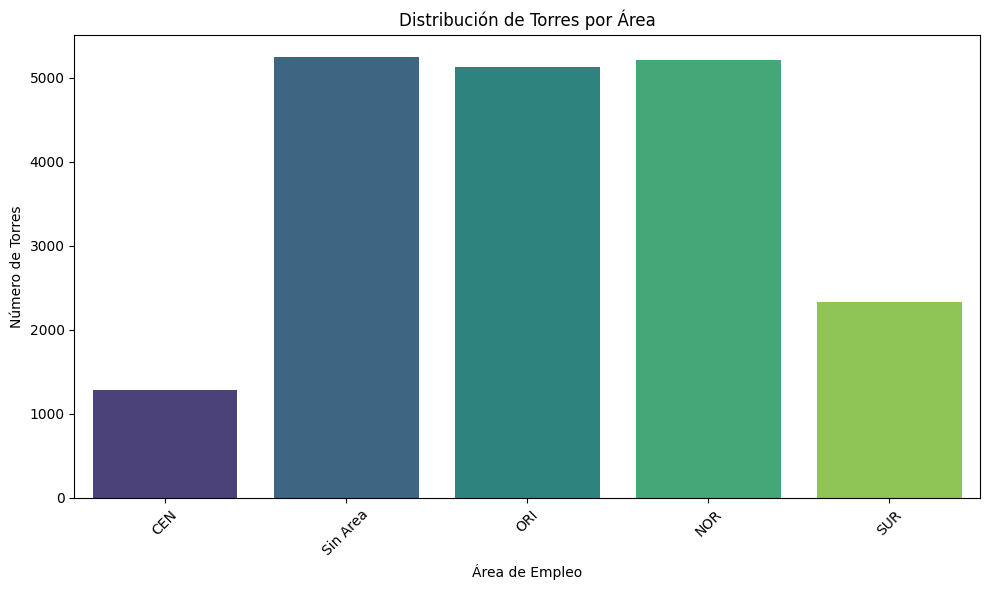

In [113]:
# Gráfica de Distribución de Torres por Área
plt.figure(figsize=(10, 6))
sns.countplot(data=df_torres, x='Area_Empre', palette='viridis', hue='Area_Empre')
plt.title('Distribución de Torres por Área')
plt.xticks(rotation=45)
plt.xlabel('Área de Empleo')
plt.ylabel('Número de Torres')
plt.tight_layout()
plt.show()

**Gráfica 1:** Se puede observar que la distribución de las torres de la empresa ISA está muy enfocada a las áreas ORI y NOR con una frecuencia superior a 5000 en ambas, lo que significa que estas son sus mayores áreas de desempeño. Además, podemos observar que la mayor frecuencia de torres no tienen una área asignada, lo que significa que más de 5000 torres no se registran en el sistema adecuadamente

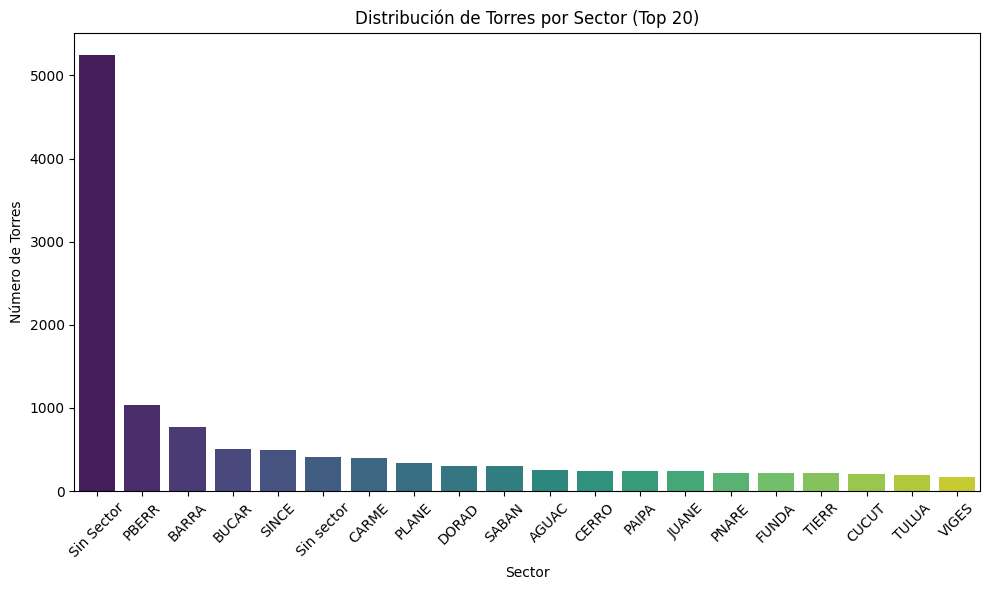

In [114]:
# Gráfica de Torres por Sector (Primeros 20)
sectores = df_torres['Sector'].value_counts().head(20)
sectores

plt.figure(figsize=(10, 6))
sns.barplot(x=sectores.index, y=sectores.values, palette='viridis', hue=sectores.index)
plt.title('Distribución de Torres por Sector (Top 20)')
plt.xticks(rotation=45)
plt.xlabel('Sector')
plt.ylabel('Número de Torres')
plt.tight_layout()
plt.show()

**Gráfica 2:** esta gráfica refleja los primeros 20 sectores donde la empresa genera mayor influencia. Se puede observar que más de 5000 torres como en el Área, no están registradas a un sector.

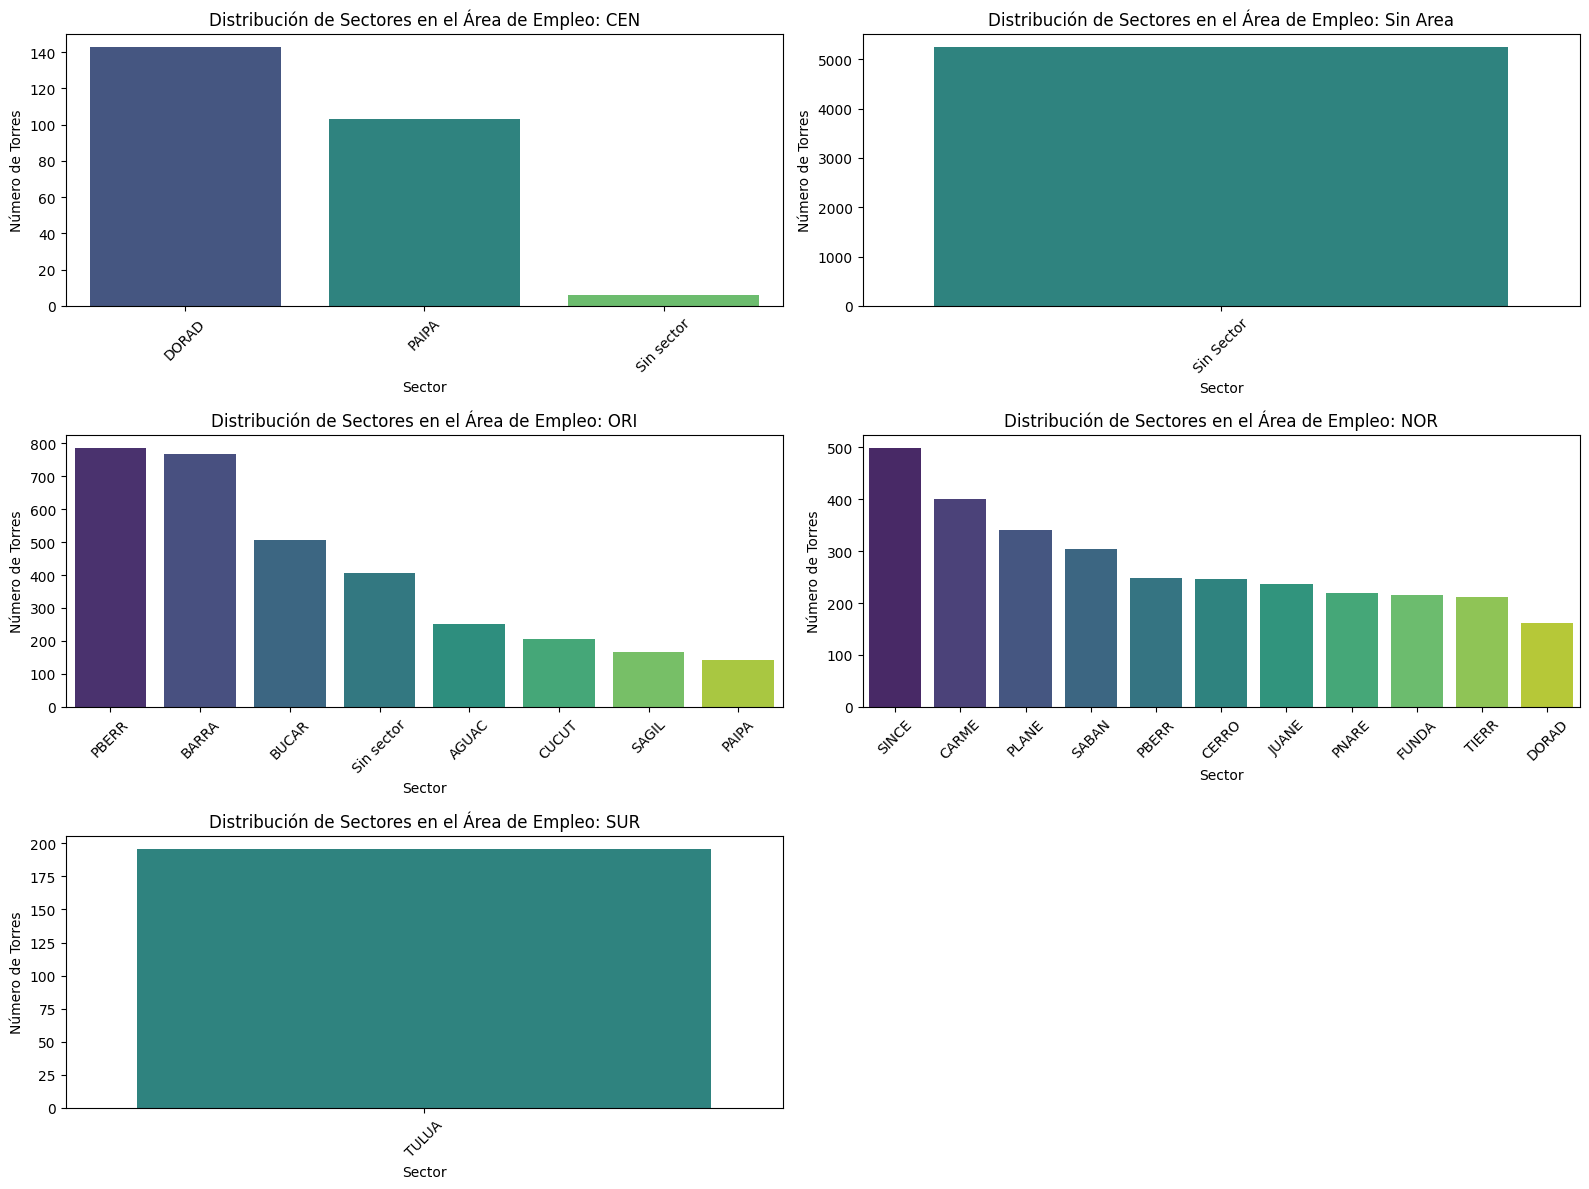

In [117]:
# Filtrar los primeros 20 sectores por número de torres
top_20_sectores = df_torres.groupby('Sector')['Area_Empre'].count().nlargest(20).index
df_top_20 = df_torres[df_torres['Sector'].isin(top_20_sectores)]

# Gráfica de Sectores por Área de Empleo (Top 20)
areas_empleo = df_top_20['Area_Empre'].unique()

plt.figure(figsize=(16, 12))
for i, area in enumerate(areas_empleo, 1):
    plt.subplot(3, 2, i) 
    area_data = df_top_20[df_top_20['Area_Empre'] == area]
    sector_counts = area_data['Sector'].value_counts()
    sns.barplot(x=sector_counts.index, y=sector_counts.values, palette='viridis', hue=sector_counts.index)
    plt.title(f'Distribución de Sectores en el Área de Empleo: {area}')
    plt.xticks(rotation=45)
    plt.xlabel('Sector')
    plt.ylabel('Número de Torres')

plt.tight_layout()
plt.show()

**Gráfica 3:** se confirma lo anteriormente mencionado con respecto a lás dos áreas de empleo más concurrentes y se refleja cuales son los sectores dentro de esas áreas que más se repiten

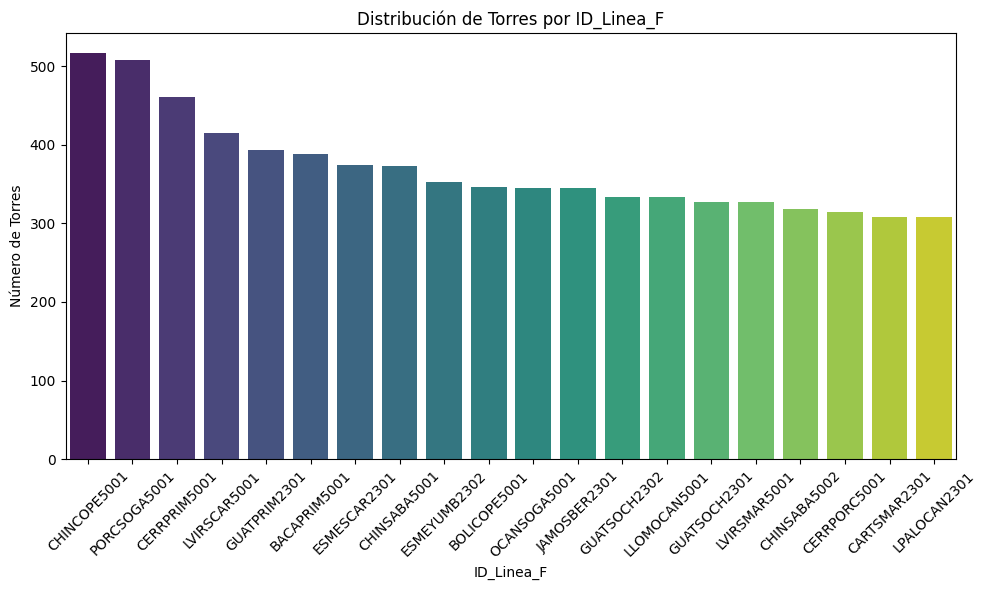

In [118]:
# Gráfica ID_Linea_F (Primeros 20)
datos_lineas = df_torres['ID_Linea_F'].value_counts().head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=datos_lineas.index, y=datos_lineas.values, palette='viridis', hue=datos_lineas.index)
plt.title('Distribución de Torres por ID_Linea_F')
plt.xticks(rotation=45)
plt.xlabel('ID_Linea_F')
plt.ylabel('Número de Torres')
plt.tight_layout()
plt.show()

**Gráfica 4:** esta gráfica refleja cuales son las primeras 20 líneas más implementadas y su respectivo número de torres

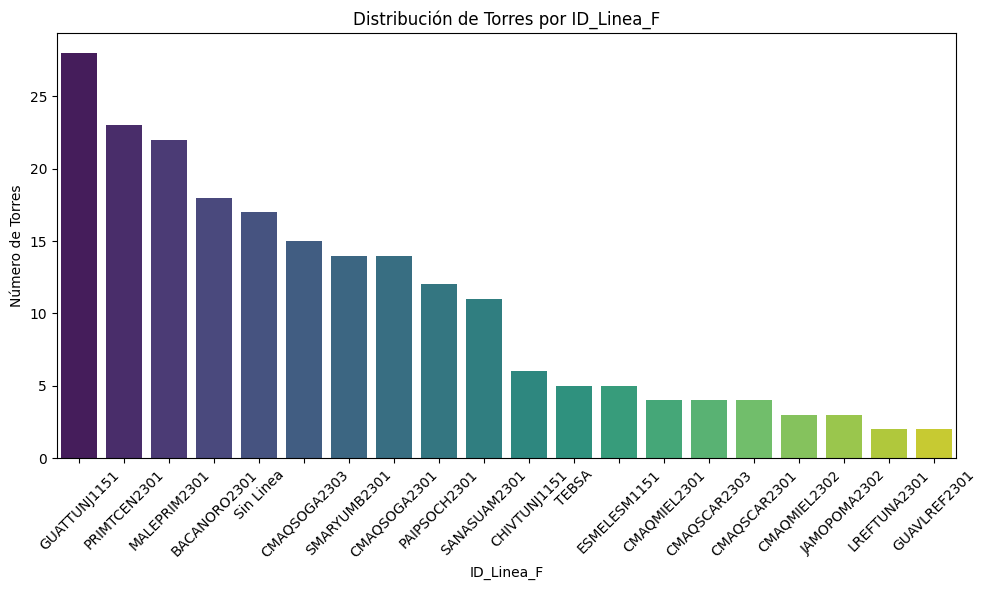

In [80]:
# Gráfica ID_Linea_F (Ultimos 20)
datos_lineas = df_torres['ID_Linea_F'].value_counts().tail(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=datos_lineas.index, y=datos_lineas.values, palette='viridis', hue=datos_lineas.index)
plt.title('Distribución de Torres por ID_Linea_F')
plt.xticks(rotation=45)
plt.xlabel('ID_Linea_F')
plt.ylabel('Número de Torres')
plt.tight_layout()
plt.show()

**Gráfica 5:** esta gráfica refleja cuales son las últimas 20 líneas más implementadas y su respectivo número de torres

### Análisis Torres con Equipo

In [98]:
df_torres_equipo = pd.read_csv('../Hackathon ISA/Datasets/Torres_STN_con equipo.csv')
df_torres_equipo

,Torre_No,Sector,JUR_CAR,Agrupacion,Equipo,ID_Linea_F,Nombre_Tor,Area_Empre,Clave
0,Torre 1,Sin sector,NaN,NaN,NaN,CHIVTUNJ1151,NaN,CEN,CHIVTUNJ1151-Torre 1
1,Torre 2,Sin sector,NaN,NaN,NaN,CHIVTUNJ1151,NaN,CEN,CHIVTUNJ1151-Torre 2
2,Torre 3,Sin sector,NaN,NaN,NaN,CHIVTUNJ1151,NaN,CEN,CHIVTUNJ1151-Torre 3
3,Torre 4,Sin sector,NaN,NaN,NaN,CHIVTUNJ1151,NaN,CEN,CHIVTUNJ1151-Torre 4
4,Torre 5,Sin sector,NaN,NaN,NaN,CHIVTUNJ1151,NaN,CEN,CHIVTUNJ1151-Torre 5
...,...,...,...,...,...,...,...,...,...
19218,Torre 510,FUNDA,NaN,NaN,NaN,CHINCOPE5001,NaN,NOR,CHINCOPE5001-Torre 510
19219,Torre 511,FUNDA,NaN,NaN,NaN,CHINCOPE5001,NaN,NOR,CHINCOPE5001-Torre 511
19220,Torre 512,FUNDA,NaN,NaN,NaN,CHINCOPE5001,NaN,NOR,CHINCOPE5001-Torre 512
19221,Torre 513,FUNDA,NaN,NaN,NaN,CHINCOPE5001,NaN,NOR,CHINCOPE5001-Torre 513


In [99]:
df_torres_equipo.isnull().sum()

Torre_No          7
Sector         5250
JUR_CAR       19223
Agrupacion    19223
Equipo         4072
ID_Linea_F       17
Nombre_Tor    17652
Area_Empre     5250
Clave            12
dtype: int64

In [100]:
df_torres_equipo = df_torres_equipo.drop(['JUR_CAR', 'Agrupacion', 'ID_Linea_F', 'Nombre_Tor', 'Clave'], axis=1)
df_torres_equipo

,Torre_No,Sector,Equipo,Area_Empre
0,Torre 1,Sin sector,NaN,CEN
1,Torre 2,Sin sector,NaN,CEN
2,Torre 3,Sin sector,NaN,CEN
3,Torre 4,Sin sector,NaN,CEN
4,Torre 5,Sin sector,NaN,CEN
...,...,...,...,...
19218,Torre 510,FUNDA,NaN,NOR
19219,Torre 511,FUNDA,NaN,NOR
19220,Torre 512,FUNDA,NaN,NOR
19221,Torre 513,FUNDA,NaN,NOR


In [103]:
df_torres_equipo.dropna(subset=['Equipo'], inplace=True)
df_torres_equipo

,Torre_No,Sector,Equipo,Area_Empre
11,Torre 70,PBERR,102596.0,ORI
12,Torre 71,PBERR,102597.0,ORI
13,Torre 72,PBERR,102598.0,ORI
14,Torre 73,PBERR,102599.0,ORI
15,Torre 74,PBERR,102600.0,ORI
...,...,...,...,...
18390,Torre 295,POPAY,104760.0,SUR
18391,Torre 296,POPAY,104761.0,SUR
18392,Torre 297,POPAY,104762.0,SUR
18393,Torre 298,POPAY,104763.0,SUR


In [104]:
df_torres_equipo.isnull().sum()

Torre_No         0
Sector        2561
Equipo           0
Area_Empre    2561
dtype: int64

In [105]:
df_torres_equipo['Sector'] = df_torres_equipo['Sector'].fillna('Sin Sector')
df_torres_equipo['Area_Empre'] = df_torres_equipo['Area_Empre'].fillna('Sin Area')

In [106]:
df_torres_equipo.isnull().sum()

Torre_No      0
Sector        0
Equipo        0
Area_Empre    0
dtype: int64

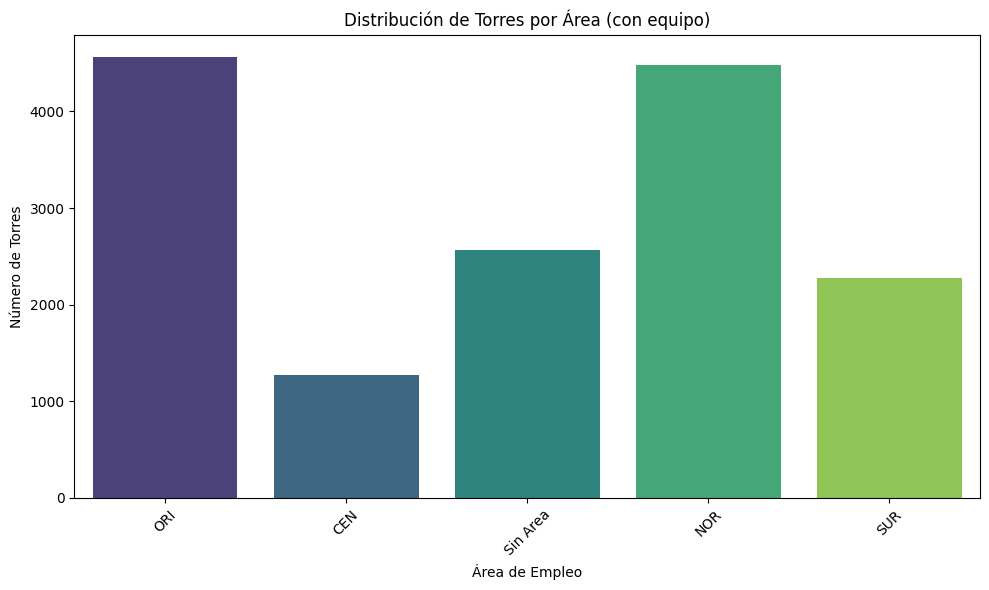

In [119]:
# Gráfica de Distribución de Torres por Área (con equipo)
plt.figure(figsize=(10, 6))
sns.countplot(data=df_torres_equipo, x='Area_Empre', palette='viridis', hue='Area_Empre')
plt.title('Distribución de Torres por Área (con equipo)')
plt.xticks(rotation=45)
plt.xlabel('Área de Empleo')
plt.ylabel('Número de Torres')
plt.tight_layout()
plt.show()

**Gráfica 6:** esta gráfica refleja la influencia del equipo sobre cada una de las áreas y a diferencia de la gráfica sin el análisis del equipo, se puede observar que los que están sin área tienen una frecuencia menor y las áreas más concurridas poseen una frecuencia muy similar, lo que implica que en estas zonas hay un equipo presente.

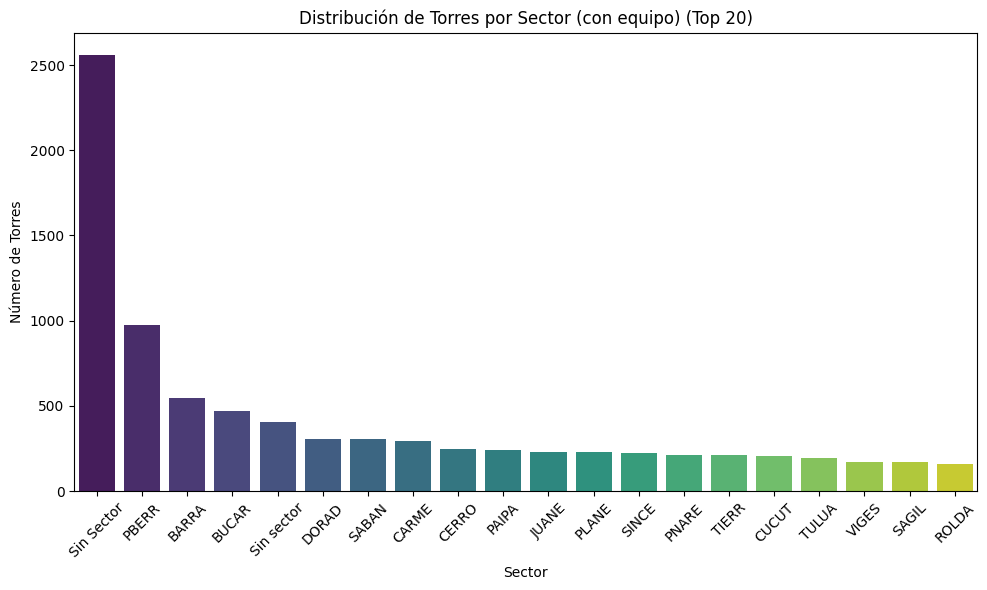

In [120]:
# Gráfica de Distribución de Torres por Sector (con equipo) (Top 20)
sectores_equipo = df_torres_equipo['Sector'].value_counts().head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=sectores_equipo.index, y=sectores_equipo.values, palette='viridis', hue=sectores_equipo.index)
plt.title('Distribución de Torres por Sector (con equipo) (Top 20)')
plt.xticks(rotation=45)
plt.xlabel('Sector')
plt.ylabel('Número de Torres')
plt.tight_layout()
plt.show()

**Gráfica 7:** esta gráfica refleja los primeros 20 sectores donde la empresa genera mayor influencia y poseen equipo